In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier #max_depth parameter, controls complexity of model, use cross-valudation to find good value of parameter
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC #parameter gamma that controls complexity, use cross-validation to select (cover a wide range of values)
from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot as plt
import numpy as np


train_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

#how the data works
train.head()


le = LabelEncoder()
le.fit(train["Species"])

#this is just preparing the data i.e. dropping n/as 
def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)


In [6]:
#selecting the columns that we want
all_qual_cols = ["Clutch Completion", "Sex"]
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)']

for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = qual_cols + list(pair) 
    print(cols)
    # you could train models and score them here, keeping the list of 
    # columns for the model that has the best score. 
    # 

    
# this counts as 3 features because the two Clutch Completion 
# columns are transformations of a single original measurement. 
# you should find a way to automatically select some better columns
# as suggested in the code block above
cols = ["Flipper Length (mm)", "Body Mass (g)", "Clutch Completion_No", "Clutch Completion_Yes"]

['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Length (mm)', 'Culmen Depth (mm)']
['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Length (mm)', 'Flipper Length (mm)']
['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Depth (mm)', 'Flipper Length (mm)']
['Sex_FEMALE', 'Sex_MALE', 'Culmen Length (mm)', 'Culmen Depth (mm)']
['Sex_FEMALE', 'Sex_MALE', 'Culmen Length (mm)', 'Flipper Length (mm)']
['Sex_FEMALE', 'Sex_MALE', 'Culmen Depth (mm)', 'Flipper Length (mm)']


In [7]:
LR = LogisticRegression()
LR.fit(X_train[cols], y_train)
LR.score(X_train[cols], y_train)


test_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)

X_test, y_test = prepare_data(test)
LR.score(X_test[cols], y_test)

0.6617647058823529

/Users/bridgetulian/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/bridgetulian/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


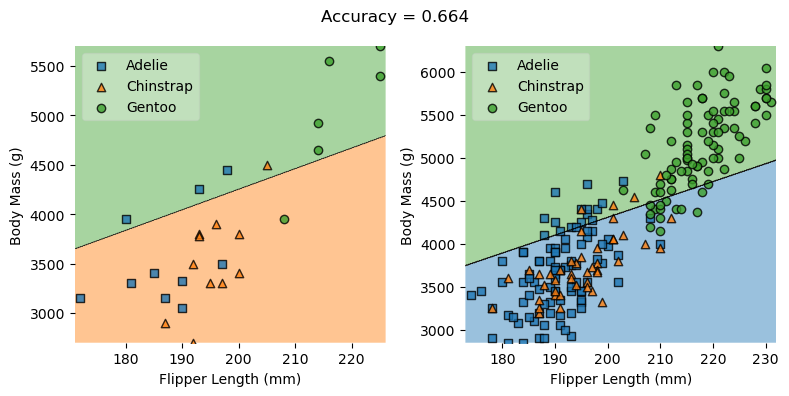

In [8]:
def decision_region_panel(X, y, model, qual_features):  
  p = len(qual_features)
  fig, axarr = plt.subplots(1, p, figsize=(4*p,4))
  for i in range(p):

      filler_feature_values = {2+j: 0 for j in range(p)}

      filler_feature_values.update({2+i: 1})

      ix = X[qual_features[i]] == 1

      ax = axarr[i]

      plot_decision_regions(np.array(X[ix]), y[ix], clf=model,
                            filler_feature_values=filler_feature_values,
                            filler_feature_ranges={2+j: 0.1 for j in range(p)},
                            legend=2, ax=ax)

      ax.set_xlabel(X.columns[0])
      ax.set_ylabel(X.columns[1])

      handles, labels = ax.get_legend_handles_labels()
      ax.legend(handles, 
          ["Adelie", "Chinstrap", "Gentoo"], 
           framealpha=0.3, scatterpoints=1)

  # Adding axes annotations
  fig.suptitle(f'Accuracy = {model.score(X, y).round(3)}')
  plt.tight_layout()
  plt.show()
    
    
qual_features = ["Clutch Completion_No", "Clutch Completion_Yes"]
decision_region_panel(X_train[cols], y_train, LR, qual_features)

# to do 

one interesting displayed figure with pandas.groupby().aggregate maybe, discussion of figure and table

model: three features of data and model trained on those features that achieves 100% testing accuracy (reproducible process, code up a search)
*one must be qualitative*
*two must be quantitative*

evaluate: show decision regions of your finished model, split out by qualitative feature